In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

In [3]:
filepath='data_cleaning.csv'
df=pd.read_csv(filepath)
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [4]:
check_cols=['unit price',
    'line item quantity',
    'line item value',
    'weight (kilograms)',
    'freight cost (usd)',
    'line item insurance (usd)']
x_train=df[check_cols]
x_train.head()

,unit price,line item quantity,line item value,weight (kilograms),freight cost (usd),line item insurance (usd)
0,0.97,19,551.0,13,780.34,NaN
1,0.03,1000,6200.0,358,4521.5,NaN
2,0.80,500,40000.0,171,1653.78,NaN
3,0.07,31920,127360.8,1855,16007.06,NaN
4,0.05,38000,121600.0,7590,45450.08,NaN


In [5]:
# clf=IsolationForest(n_jobs=6,random_state=23,contamination=0.05)
# clf.fit(x_train)
# y_pred_train = clf.predict(x_train)
# y_pred_train

x_train=x_train.apply(pd.to_numeric,errors='coerce')
x_train=x_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
pd.value_counts(y_pred_train)

 1    5692
-1     300
Name: count, dtype: int64

In [7]:
x_train.loc[y_pred_train==-1,:]


,unit price,line item quantity,line item value,weight (kilograms),freight cost (usd),line item insurance (usd)
84,1.68,50000,2520000.00,4093.0,9339.00,4939.20
219,23.00,6998,160954.00,5057.0,44347.71,257.53
222,23.00,3470,79810.00,2509.0,19882.25,156.43
223,23.00,3510,80730.00,2535.0,22433.91,158.23
236,1.68,25000,1260000.00,2067.0,7933.38,2469.60
...,...,...,...,...,...,...
10051,0.14,233630,1929783.80,21394.0,13590.64,3184.14
10102,0.16,132919,1303935.39,18953.0,18461.22,1828.12
10201,0.37,112303,1252178.45,15105.0,5846.08,1548.94
10303,0.32,200000,1920000.00,26603.0,19194.37,2259.84


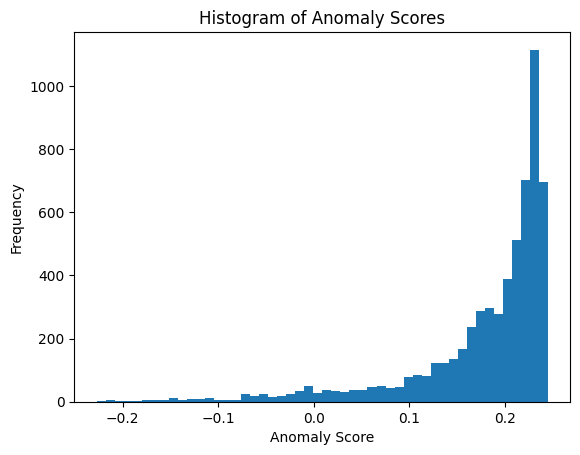

In [8]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(x_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


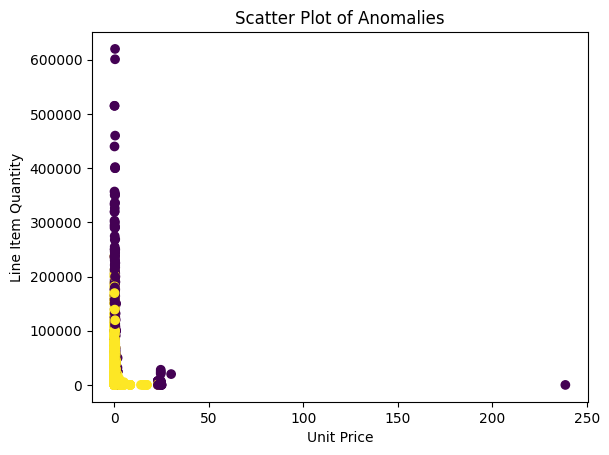

In [9]:
plt.scatter(x_train['unit price'], x_train['line item quantity'], c=y_pred_train, cmap='viridis')
plt.title("Scatter Plot of Anomalies")
plt.xlabel("Unit Price")
plt.ylabel("Line Item Quantity")
plt.show()

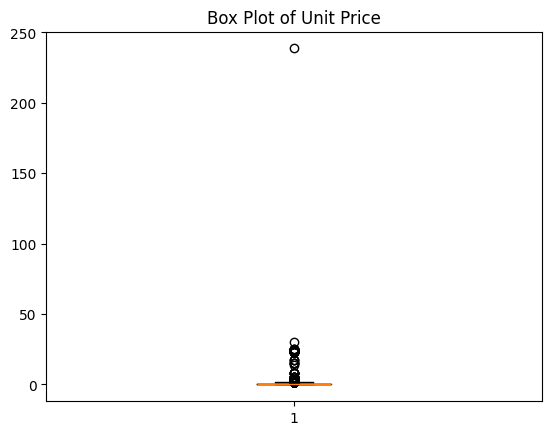

In [10]:
plt.boxplot(x_train['unit price'])
plt.title("Box Plot of Unit Price")
plt.show()


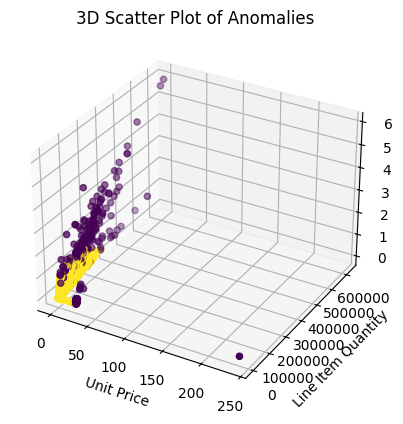

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train['unit price'], x_train['line item quantity'], x_train['line item value'], c=y_pred_train, cmap='viridis')
ax.set_xlabel('Unit Price')
ax.set_ylabel('Line Item Quantity')
ax.set_zlabel('Line Item Value')
plt.title("3D Scatter Plot of Anomalies")
plt.show()


In [12]:
cols=['line item quantity']
n_train=df[cols]
n_train.head()

,line item quantity
0,19
1,1000
2,500
3,31920
4,38000


In [13]:
n_train=n_train.apply(pd.to_numeric,errors='coerce')
n_train=n_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(n_train)
m_pred_train=clf.predict(n_train)
m_pred_train

array([ 1,  1,  1, ..., -1,  1,  1])

In [14]:
pd.value_counts(m_pred_train)

 1    9808
-1     516
Name: count, dtype: int64

In [15]:
n_train.loc[m_pred_train==-1,:]

,line item quantity
138,95500
532,98400
800,100000
1147,125000
1153,125010
...,...
10303,200000
10305,300000
10318,205243
10319,166571


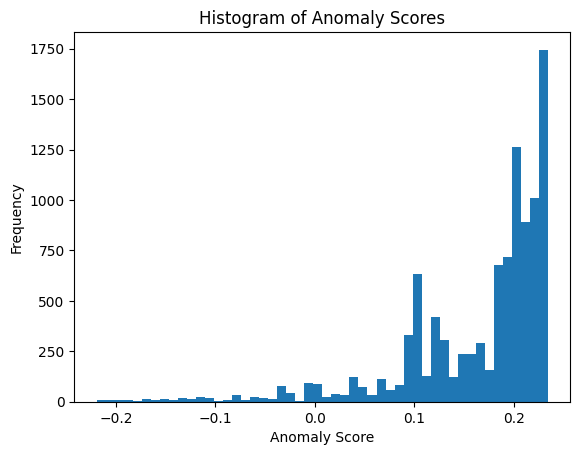

In [16]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(n_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()
